In [2]:
from google.colab import drive        #Mounting the drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt         #importing the modules
import numpy as np
import seaborn as sns

In [4]:
import pandas as pd           #Importing pandas and creagting a dataframe
filename = '/content/drive/MyDrive/CODING_DOJO/WEEK3/Global import of cocoa beans.xlsx'     #Data taken from https://data.world/makeovermonday/2020w52
Cocoa_df=pd.read_excel(filename)

In [5]:
Cocoa_df.info()        #Checking for any missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Region            15 non-null     object
 1   Year              15 non-null     int64 
 2   Import in tonnes  15 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 488.0+ bytes


In [6]:
Cocoa_df.head()       #checking the dataset

,Region,Year,Import in tonnes
0,Asia & Oceania,2015,565000
1,Asia & Oceania,2016,592000
2,Asia & Oceania,2017,866000
3,Asia & Oceania,2018,927000
4,Asia & Oceania,2019,924000


In [7]:
Cocoa_df_1=Cocoa_df.groupby(['Region'])['Import in tonnes'].sum()         #grouping the data regionwise to get the share of import per region
Cocoa_df_1


Region
Americas           2999000
Asia & Oceania     3874000
Europe            11714000
Name: Import in tonnes, dtype: int64

In [8]:
Cocoa_df_1_X=Cocoa_df_1.index
Cocoa_df_1_Y=Cocoa_df_1.values


In [9]:
temp=Cocoa_df_1_Y.sum()

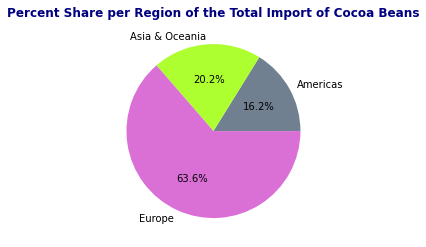

In [10]:
for ele in range(0,len(Cocoa_df_1_Y)):              #calculating the percent share of total import
  Cocoa_df_1_Y[ele]=Cocoa_df_1_Y[ele]/temp*100

mycolors=['slategrey', 'greenyellow', 'orchid' ]

plt.pie(Cocoa_df_1_Y, labels=Cocoa_df_1_X, autopct='%1.1f%%', colors=mycolors);
plt.title('Percent Share per Region of the Total Import of Cocoa Beans', c='navy', fontweight='bold');

***This plot gives us the percent breakdown of the each region's share in Global Cocoa Beans Import. Clearly Europe has been a leader in the cocoa beans imports.***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


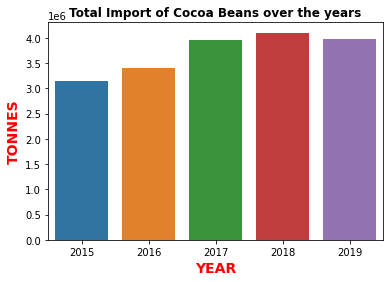

In [15]:
Cocoa_df_2=Cocoa_df.groupby(['Year'])['Import in tonnes'].sum()       #Grouping all the imports per year
Cocoa_df_2
Cocoa_df_2_X=Cocoa_df_2.index
Cocoa_df_2_Y=Cocoa_df_2.values

sns.barplot(Cocoa_df_2_X, Cocoa_df_2_Y);
plt.title('Total Import of Cocoa Beans over the years', fontweight='bold')
plt.xlabel('YEAR', fontweight='bold', c='red', fontsize=14)
plt.ylabel('TONNES', fontweight='bold', c='red', fontsize=14);

***The import of Cocoa Beans seems to have peaked in the year 2018. Later it decreased again in 2019. It is the overall demand of cocoa beans in all the regions.***

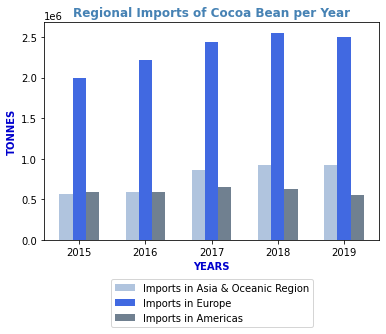

In [12]:
Cocoa_df_3_A=Cocoa_df.loc[(Cocoa_df['Region']=='Asia & Oceania',('Year', 'Import in tonnes'))]      #Clustered bar diagram to compare the imports in each region per year
Cocoa_df_3_A_X=Cocoa_df_3_A['Year'].values                                                          #Inspired by https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/
Cocoa_df_3_X=np.arange(len(Cocoa_df_3_A_X))

Cocoa_df_3_A_Y=Cocoa_df_3_A['Import in tonnes'].values
Cocoa_df_3_E=Cocoa_df.loc[(Cocoa_df['Region']=='Europe',('Year', 'Import in tonnes'))]
Cocoa_df_3_E_Y=Cocoa_df_3_E['Import in tonnes'].values
Cocoa_df_3_Am=Cocoa_df.loc[(Cocoa_df['Region']=='Americas',('Year', 'Import in tonnes'))]
Cocoa_df_3_Am_Y=Cocoa_df_3_Am['Import in tonnes'].values

plt.bar(Cocoa_df_3_X - 0.2,Cocoa_df_3_A_Y, 0.2, color= 'lightsteelblue', label = 'Imports in Asia & Oceanic Region')
plt.bar(Cocoa_df_3_X - 0,Cocoa_df_3_E_Y, 0.2, color= 'royalblue', label = 'Imports in Europe')
plt.bar(Cocoa_df_3_X + 0.2,Cocoa_df_3_Am_Y, 0.2, color= 'slategray', label = 'Imports in Americas')
plt.xticks(Cocoa_df_3_X, Cocoa_df_3_A_X)
plt.xlabel('YEARS', fontweight='bold', c='mediumblue')
plt.ylabel('TONNES', fontweight='bold', c='mediumblue')
plt.title('Regional Imports of Cocoa Bean per Year',c='steelblue', fontweight='bold', fontsize=12)
plt.legend(loc= (0.2,-0.4));

***This plot gives the side by side comparison of the imports of Cocoa Bean by separate regions in each year.***